# Analysis of hotels from booking.com

##### Import all necessary libraries
___


In [43]:
import pandas as pd
import os
import glob # get all hotels data (multiple csvs) into one dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels
import plotly.graph_objects as go

#### Load all the hotel data into one data frame
___

In [ ]:
# get current working directory
pwd = os.getcwd() 

files = glob.glob(pwd + '/data_csv/*.csv')

#create dataframe with all hotels data
all_hotels = pd.DataFrame()


for file in files:
            df_temp = pd.read_csv(file)
            all_hotels = all_hotels.append(df_temp, ignore_index=True)

all_hotels.drop('Unnamed: 0', axis=1, inplace=True)

#save all hotels into one csv file calls 'all_hotels.csv'
all_hotels.to_csv("all_hotels.csv")

#### Working with duplicates in dataframe
___

In [171]:
# let's see if we have duplicate rows in dataframe
all_hotels.duplicated().sum() # 2691

all_hotels[all_hotels.duplicated()]

,Hotel name,Marks,Region City,Performances,Reviews,Price,Distances,Discriptions,Stars,Breakfast,Guests reviews:
27,Canopy by Hilton Zagreb City Centre,9.0,"Lower Town, Zagreb",Wonderful,"1,827 reviews",Price 430 zł,1 km from center,Standard King Room,4,NaN,NaN
29,Rooms Zagreb 17,9.3,"Upper Town – Medvescak, Zagreb",Wonderful,544 reviews,Price 253 zł,250 m from center,Comfort Double Room,4,NaN,Location 9.9
31,Neno,7.8,"Maksimir, Zagreb",Good,446 reviews,Price 94 zł,2.1 km from center,Double Room,0,NaN,NaN
44,Hotel 9,9.0,Zagreb,Wonderful,"1,631 reviews",Price 477 zł,1.8 km from center,Standard Double Room,4,NaN,NaN
52,Hotel AS,9.0,"Upper Town – Medvescak, Zagreb",Wonderful,441 reviews,Price 430 zł,1.6 km from center,Single Deluxe,4,Breakfast included,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15314,Olive Tree Apartment of Athens - city center,9.1,"Athens City Centre, Athens",Wonderful,75 reviews,Price 414 zł,1.7 km from center,Apartment,3,NaN,NaN
15315,"Fix Metro Apartments, 5 min to Acropolis",7.0,"Koukaki, Athens",Good,65 reviews,Original price 404 zł. Current price 380 zł.,1.4 km from center,One-Bedroom Apartment (4 Adults),3,NaN,Location 9.5
15316,Amazing Suite at Glyfada with sea view & jacuzzi,9.4,"Glyfada, Athens",Wonderful,18 reviews,Price 694 zł,13.2 km from center,One-Bedroom Apartment,4,NaN,Location 10
15348,SAGITTARIUS - FALIRO SEA SIDE APARTMENT,8.9,"Palaio Faliro, Athens",Excellent,93 reviews,Price 701 zł,6.6 km from center,Apartment,4,NaN,NaN


In [172]:
# drop all duplicates
all_hotels.drop_duplicates(inplace=True)
all_hotels.duplicated().sum() 

0

In [173]:
# replace white space with underscore and make lowercase in columns name in dataframe
all_hotels.columns = [col.lower().replace(" ", "_") for col in all_hotels.columns]

# make a copy of dataframe
hotels = all_hotels.copy()
hotels.head()

,hotel_name,marks,region_city,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:
0,Zagreb Speeka,8.1,"Lower Town, Zagreb",Very Good,690 reviews,Price 106 zł,450 m from center,Bed in 4-Bed Dormitory Room,0,NaN,NaN
1,Timeout Heritage Hotel Zagreb,7.7,"Lower Town, Zagreb",Good,"2,688 reviews",Price 228 zł,300 m from center,Family Room with City View,4,NaN,Location 9.5
2,The Westin Zagreb,8.2,"Lower Town, Zagreb",Very Good,"2,568 reviews",Price 500 zł,1.1 km from center,"Deluxe Queen Non Smoking, Guest room, 1 Queen,...",5,NaN,NaN
3,HI Hostel Zagreb,6.8,"Lower Town, Zagreb",Review score,"2,059 reviews",Price 78 zł,0.8 km from center,Single Bed in 6-Bed Dormitory Room,0,NaN,NaN
4,Dormir Apartments,9.3,Zagreb,Wonderful,222 reviews,Price 211 zł,1.9 km from center,Apartment with Balcony,3,NaN,NaN


### Descriptive Statistics
___

In [174]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12676 entries, 0 to 15366
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotel_name       12676 non-null  object 
 1   marks            12552 non-null  float64
 2   region_city      12676 non-null  object 
 3   performances     12557 non-null  object 
 4   reviews          12557 non-null  object 
 5   price            12676 non-null  object 
 6   distances        12676 non-null  object 
 7   discriptions     12676 non-null  object 
 8   stars            12676 non-null  int64  
 9   breakfast        2637 non-null   object 
 10  guests_reviews:  5225 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.2+ MB


In [175]:
hotels.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel_name,12676,11676,Hotel Roma,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marks,12552.0,NaN,NaN,NaN,8.289579,0.863713,1.0,7.9,8.4,8.9,10.0
region_city,12676,719,"Fatih, Istanbul",380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
performances,12557,9,Very Good,3829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews,12557,3502,1 review,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,12676,4028,Price 328 zł,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distances,12676,212,0.6 km from center,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discriptions,12676,1776,Single Room,1392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stars,12676.0,NaN,NaN,NaN,2.790076,1.443981,0.0,3.0,3.0,4.0,5.0
breakfast,2637,3,Breakfast included,2633,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Cleaning
___

In [176]:
hotels['performances'].value_counts()

Very Good           3829
Good                2759
Excellent           2419
Wonderful           2089
Review score         810
Exceptional          646
Exceptional 10         3
Wonderful 9.0          1
Review score 6.2       1
Name: performances, dtype: int64

In [164]:
def clear_performances(lambda_input):
    ''' delete not necessary rows from performances column 
    such as Exceptional 10, Wonderful 9.0', Review score 6.2 '''

    useless_labels = ['Exceptional 10', 'Wonderful 9.0', 'Review score 6.2']
    
    if lambda_input not in useless_labels:
        return lambda_input
    else:
        return np.nan
    

hotels['performances'] = hotels['performances'].apply(lambda x :clear_performances(x))
hotels['performances'].value_counts()

Very Good        3829
Good             2759
Excellent        2419
Wonderful        2089
Review score      810
Exceptional       646
Name: performances, dtype: int64

In [165]:
# spilt column region_city into two columns 
hotels['region'] = hotels['region_city'].apply(lambda x: x.split(", ")[0] if len(x.split(", ")) == 2 else np.nan)
hotels['city'] = hotels['region_city'].apply(lambda x: x.split(", ")[1] if len(x.split(", ")) == 2 else x)
hotels.head()

,hotel_name,marks,region_city,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city
0,Zagreb Speeka,8.1,"Lower Town, Zagreb",Very Good,690 reviews,Price 106 zł,450 m from center,Bed in 4-Bed Dormitory Room,0,NaN,NaN,Lower Town,Zagreb
1,Timeout Heritage Hotel Zagreb,7.7,"Lower Town, Zagreb",Good,"2,688 reviews",Price 228 zł,300 m from center,Family Room with City View,4,NaN,Location 9.5,Lower Town,Zagreb
2,The Westin Zagreb,8.2,"Lower Town, Zagreb",Very Good,"2,568 reviews",Price 500 zł,1.1 km from center,"Deluxe Queen Non Smoking, Guest room, 1 Queen,...",5,NaN,NaN,Lower Town,Zagreb
3,HI Hostel Zagreb,6.8,"Lower Town, Zagreb",Review score,"2,059 reviews",Price 78 zł,0.8 km from center,Single Bed in 6-Bed Dormitory Room,0,NaN,NaN,Lower Town,Zagreb
4,Dormir Apartments,9.3,Zagreb,Wonderful,222 reviews,Price 211 zł,1.9 km from center,Apartment with Balcony,3,NaN,NaN,NaN,Zagreb


In [166]:
# drop unnecessary column region_city
hotels.drop(columns='region_city', inplace=True)
hotels.head()

,hotel_name,marks,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city
0,Zagreb Speeka,8.1,Very Good,690 reviews,Price 106 zł,450 m from center,Bed in 4-Bed Dormitory Room,0,NaN,NaN,Lower Town,Zagreb
1,Timeout Heritage Hotel Zagreb,7.7,Good,"2,688 reviews",Price 228 zł,300 m from center,Family Room with City View,4,NaN,Location 9.5,Lower Town,Zagreb
2,The Westin Zagreb,8.2,Very Good,"2,568 reviews",Price 500 zł,1.1 km from center,"Deluxe Queen Non Smoking, Guest room, 1 Queen,...",5,NaN,NaN,Lower Town,Zagreb
3,HI Hostel Zagreb,6.8,Review score,"2,059 reviews",Price 78 zł,0.8 km from center,Single Bed in 6-Bed Dormitory Room,0,NaN,NaN,Lower Town,Zagreb
4,Dormir Apartments,9.3,Wonderful,222 reviews,Price 211 zł,1.9 km from center,Apartment with Balcony,3,NaN,NaN,NaN,Zagreb


In [189]:
#create a copy of hotels dataframe
hotels_edited = hotels.copy()

# check how many column 'reviews' has NaN values
hotels_edited['reviews'].isnull().sum() # 119

# if aren't reviews in the hotel, replace NaN values with 0
hotels_edited.dropna(axis=0, subset='reviews', inplace=True)
hotels_edited['reviews'].isnull().sum() # 0

# deleting the 'reviews' part for each rows in reviews column
hotels_edited['reviews'] = hotels_edited['reviews'].apply(lambda x: x.split(" ")[0])

# convert number of reviews to integer
hotels_edited['reviews'] = hotels_edited['reviews'].apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))
hotels_edited

,hotel_name,marks,region_city,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:
0,Zagreb Speeka,8.1,"Lower Town, Zagreb",Very Good,690,Price 106 zł,450 m from center,Bed in 4-Bed Dormitory Room,0,NaN,NaN
1,Timeout Heritage Hotel Zagreb,7.7,"Lower Town, Zagreb",Good,2688,Price 228 zł,300 m from center,Family Room with City View,4,NaN,Location 9.5
2,The Westin Zagreb,8.2,"Lower Town, Zagreb",Very Good,2568,Price 500 zł,1.1 km from center,"Deluxe Queen Non Smoking, Guest room, 1 Queen,...",5,NaN,NaN
3,HI Hostel Zagreb,6.8,"Lower Town, Zagreb",Review score,2059,Price 78 zł,0.8 km from center,Single Bed in 6-Bed Dormitory Room,0,NaN,NaN
4,Dormir Apartments,9.3,Zagreb,Wonderful,222,Price 211 zł,1.9 km from center,Apartment with Balcony,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15361,Kleopatra Apartment in Acropolis,9.2,"Koukaki, Athens",Wonderful,10,Price 423 zł,1.2 km from center,Apartment with Balcony,4,NaN,Location 9.8
15362,ATHENS BEAUTIFUL APARTMENT,4.9,"Athens City Centre, Athens",Review score,9,Price 118 zł,1.4 km from center,One-Bedroom Apartment,0,NaN,NaN
15363,Eχquisite apt in Acropolis-plaka/vaccinatedHost,9.1,"Koukaki, Athens",Wonderful,18,"Price 1,034 zł",1.2 km from center,Three-Bedroom Apartment,4,NaN,Location 10
15365,Ampelokipi metro st. 2 bedrooms 6 pers. apartment,8.5,Athens,Very Good,4,Original price 408 zł. Current price 384 zł.,2.1 km from center,Two-Bedroom Apartment,4,NaN,Location 9.4


In [190]:
# check how many column 'distances' has NaN values
hotels_edited.distances.isnull().sum() # 0

# deleting the 'from center' part for each rows and convert meters to kilometers
hotels_edited['distances'] = hotels_edited['distances'].apply(lambda s: float(s.split(' ')[0])/1000 if ' m ' in s else s.split(' ')[0])
hotels_edited.head(5)

,hotel_name,marks,region_city,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:
0,Zagreb Speeka,8.1,"Lower Town, Zagreb",Very Good,690,Price 106 zł,0.45,Bed in 4-Bed Dormitory Room,0,NaN,NaN
1,Timeout Heritage Hotel Zagreb,7.7,"Lower Town, Zagreb",Good,2688,Price 228 zł,0.3,Family Room with City View,4,NaN,Location 9.5
2,The Westin Zagreb,8.2,"Lower Town, Zagreb",Very Good,2568,Price 500 zł,1.1,"Deluxe Queen Non Smoking, Guest room, 1 Queen,...",5,NaN,NaN
3,HI Hostel Zagreb,6.8,"Lower Town, Zagreb",Review score,2059,Price 78 zł,0.8,Single Bed in 6-Bed Dormitory Room,0,NaN,NaN
4,Dormir Apartments,9.3,Zagreb,Wonderful,222,Price 211 zł,1.9,Apartment with Balcony,3,NaN,NaN


In [57]:
# how many hotels have meals included in the price
hotels_edited['breakfast'].value_counts()

Breakfast included             2626
Breakfast & dinner included       3
Dinner included                   1
Name: breakfast, dtype: int64

In [58]:
# the highest reviews is given by guests for the location of the hotel
hotels_edited['guests_reviews:'].value_counts()

Location 9.5    852
Location 9.6    847
Location 9.4    838
Location 9.7    836
Location 9.3    740
Location 9.8    653
Location 9.9    283
Location 10     176
Name: guests_reviews:, dtype: int64

In [187]:
# make a copy of dataframe
hotels_modified = hotels_edited.copy()

def original_prices(val):
    '''Clearing the price column by deleting words 
    and converting a number to an integer'''
    res = []
    for elem in val:
        if elem.isdigit():
            res.append(elem)
        
        if elem == '.':
            return int("".join(map(str, res)))
        
    return int("".join(map(str, res)))

hotels_modified['original_price'] = hotels_modified['price'].apply(original_prices)
hotels_modified.head()

,hotel_name,marks,region_city,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,original_price
0,Zagreb Speeka,8.1,"Lower Town, Zagreb",Very Good,690,Price 106 zł,0.45,Bed in 4-Bed Dormitory Room,0,NaN,NaN,106
1,Timeout Heritage Hotel Zagreb,7.7,"Lower Town, Zagreb",Good,2688,Price 228 zł,0.3,Family Room with City View,4,NaN,Location 9.5,228
2,The Westin Zagreb,8.2,"Lower Town, Zagreb",Very Good,2568,Price 500 zł,1.1,"Deluxe Queen Non Smoking, Guest room, 1 Queen,...",5,NaN,NaN,500
3,HI Hostel Zagreb,6.8,"Lower Town, Zagreb",Review score,2059,Price 78 zł,0.8,Single Bed in 6-Bed Dormitory Room,0,NaN,NaN,78
4,Dormir Apartments,9.3,Zagreb,Wonderful,222,Price 211 zł,1.9,Apartment with Balcony,3,NaN,NaN,211


In [62]:

#creating the discount_price column by extracting from the price column, if the hotel doesn't have a discounted price, replace it with NaN
hotels_modified['discount_price'] = hotels_modified['price'].apply(lambda s: s.split()[-2] if 'Current price' in s else np.nan)
hotels_modified

,hotel_name,marks,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price,discount_price
0,Zagreb Speeka,8.1,Very Good,690,Price 106 zł,0.45,Bed in 4-Bed Dormitory Room,0,NaN,NaN,Lower Town,Zagreb,106,NaN
1,Timeout Heritage Hotel Zagreb,7.7,Good,2688,Price 228 zł,0.30,Family Room with City View,4,NaN,Location 9.5,Lower Town,Zagreb,228,NaN
2,The Westin Zagreb,8.2,Very Good,2568,Price 500 zł,1.10,"Deluxe Queen Non Smoking, Guest room, 1 Queen,...",5,NaN,NaN,Lower Town,Zagreb,500,NaN
3,HI Hostel Zagreb,6.8,Review score,2059,Price 78 zł,0.80,Single Bed in 6-Bed Dormitory Room,0,NaN,NaN,Lower Town,Zagreb,78,NaN
4,Dormir Apartments,9.3,Wonderful,222,Price 211 zł,1.90,Apartment with Balcony,3,NaN,NaN,NaN,Zagreb,211,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15361,Kleopatra Apartment in Acropolis,9.2,Wonderful,10,Price 423 zł,1.20,Apartment with Balcony,4,NaN,Location 9.8,Koukaki,Athens,423,NaN
15362,ATHENS BEAUTIFUL APARTMENT,4.9,Review score,9,Price 118 zł,1.40,One-Bedroom Apartment,0,NaN,NaN,Athens City Centre,Athens,118,NaN
15363,Eχquisite apt in Acropolis-plaka/vaccinatedHost,9.1,Wonderful,18,"Price 1,034 zł",1.20,Three-Bedroom Apartment,4,NaN,Location 10,Koukaki,Athens,1034,NaN
15365,Ampelokipi metro st. 2 bedrooms 6 pers. apartment,8.5,Very Good,4,Original price 408 zł. Current price 384 zł.,2.10,Two-Bedroom Apartment,4,NaN,Location 9.4,NaN,Athens,408,384


In [63]:
# count % percentage discount
hotels_with_discount_price = hotels_modified.copy()
hotels_with_discount_price.dropna(axis=0, subset='discount_price', inplace=True) 
hotels_with_discount_price.shape # 3252 hotels with discount price

(3277, 14)

In [64]:
hotels_with_discount_price['discount_price'] = hotels_with_discount_price['discount_price'].apply(lambda s:  int(s.replace(',', '')) if ',' in s else int(s))
hotels_with_discount_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 13 to 15365
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotel_name       3277 non-null   object 
 1   marks            3274 non-null   float64
 2   performances     3274 non-null   object 
 3   reviews          3277 non-null   int64  
 4   price            3277 non-null   object 
 5   distances        3277 non-null   float64
 6   discriptions     3277 non-null   object 
 7   stars            3277 non-null   int64  
 8   breakfast        863 non-null    object 
 9   guests_reviews:  1508 non-null   object 
 10  region           3052 non-null   object 
 11  city             3277 non-null   object 
 12  original_price   3277 non-null   int64  
 13  discount_price   3277 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 384.0+ KB


In [65]:
hotels_with_discount_price['percentage_discount'] = (1 - (hotels_with_discount_price['discount_price']/hotels_with_discount_price['original_price']))*100
hotels_with_discount_price['percentage_discount'] = hotels_with_discount_price['percentage_discount'].apply(lambda percentage_discount: round(percentage_discount,2))
hotels_with_discount_price.sort_values(by = 'percentage_discount', ascending = False)

,hotel_name,marks,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price,discount_price,percentage_discount
2978,Ravouna 1906 Bosphorus Istanbul,8.6,Excellent,428,"Original price 2,956 zł. Current price 355 zł.",2.50,Superior Room with Garden View,4,NaN,Location 9.3,Beyoglu,Istanbul,2956,355,87.99
2142,Orka Royal Hotel & Spa,7.7,Good,3061,"Original price 1,595 zł. Current price 287 zł.",0.70,Economy Room - Free Access to Spa,4,Breakfast included,NaN,Fatih,Istanbul,1595,287,82.01
2379,Saba Sultan Hotel,9.0,Wonderful,1129,"Original price 1,140 zł. Current price 271 zł.",0.60,Economy Double or Twin Room,0,NaN,Location 9.6,Fatih,Istanbul,1140,271,76.23
2143,Saba Sultan Hotel,9.0,Wonderful,1129,"Original price 1,140 zł. Current price 285 zł.",0.60,Economy Double or Twin Room,0,NaN,Location 9.6,Fatih,Istanbul,1140,285,75.00
2759,Dundar Hotel & Spa,7.2,Good,1026,"Original price 1,478 zł. Current price 370 zł.",1.00,Economy Double Room,0,Breakfast included,NaN,Fatih,Istanbul,1478,370,74.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12024,Hotel Nunù,8.4,Very Good,1005,Original price 516 zł. Current price 511 zł.,0.70,Double Room,4,Breakfast included,NaN,Naples Historic Center,Naples,516,511,0.97
12199,Napolilive B&B,8.6,Excellent,394,Original price 434 zł. Current price 430 zł.,0.45,Double Room with Balcony,3,NaN,NaN,Port of Naples,Naples,434,430,0.92
1239,Venice Sun,8.8,Excellent,128,Original price 599 zł. Current price 594 zł.,0.90,Double Room with Private Bathroom,3,NaN,NaN,Santa Croce,Venice,599,594,0.83
4135,NH Collection Amsterdam Flower Market,8.5,Very Good,4906,"Original price 1,309 zł. Current price 1,309 zł.",0.70,Superior Double or Twin Room,4,NaN,Location 9.5,Amsterdam City Center,Amsterdam,1309,1309,0.00


In [66]:
#drop column price
hotels_with_discount_price.drop(columns='price', inplace=True)
all_hotels.drop(columns='price', inplace=True)
all_hotels

,hotel_name,marks,region_city,performances,reviews,distances,discriptions,stars,breakfast,guests_reviews:
0,Zagreb Speeka,8.1,"Lower Town, Zagreb",Very Good,690 reviews,450 m from center,Bed in 4-Bed Dormitory Room,0,NaN,NaN
1,Timeout Heritage Hotel Zagreb,7.7,"Lower Town, Zagreb",Good,"2,688 reviews",300 m from center,Family Room with City View,4,NaN,Location 9.5
2,The Westin Zagreb,8.2,"Lower Town, Zagreb",Very Good,"2,568 reviews",1.1 km from center,"Deluxe Queen Non Smoking, Guest room, 1 Queen,...",5,NaN,NaN
3,HI Hostel Zagreb,6.8,"Lower Town, Zagreb",Review score,"2,059 reviews",0.8 km from center,Single Bed in 6-Bed Dormitory Room,0,NaN,NaN
4,Dormir Apartments,9.3,Zagreb,Wonderful,222 reviews,1.9 km from center,Apartment with Balcony,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15361,Kleopatra Apartment in Acropolis,9.2,"Koukaki, Athens",Wonderful,10 reviews,1.2 km from center,Apartment with Balcony,4,NaN,Location 9.8
15362,ATHENS BEAUTIFUL APARTMENT,4.9,"Athens City Centre, Athens",Review score,9 reviews,1.4 km from center,One-Bedroom Apartment,0,NaN,NaN
15363,Eχquisite apt in Acropolis-plaka/vaccinatedHost,9.1,"Koukaki, Athens",Wonderful,18 reviews,1.2 km from center,Three-Bedroom Apartment,4,NaN,Location 10
15365,Ampelokipi metro st. 2 bedrooms 6 pers. apartment,8.5,Athens,Very Good,4 reviews,2.1 km from center,Two-Bedroom Apartment,4,NaN,Location 9.4


In [67]:
hotels_with_discount_price.sort_values(by='percentage_discount', ascending=False)

,hotel_name,marks,performances,reviews,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price,discount_price,percentage_discount
2978,Ravouna 1906 Bosphorus Istanbul,8.6,Excellent,428,2.50,Superior Room with Garden View,4,NaN,Location 9.3,Beyoglu,Istanbul,2956,355,87.99
2142,Orka Royal Hotel & Spa,7.7,Good,3061,0.70,Economy Room - Free Access to Spa,4,Breakfast included,NaN,Fatih,Istanbul,1595,287,82.01
2379,Saba Sultan Hotel,9.0,Wonderful,1129,0.60,Economy Double or Twin Room,0,NaN,Location 9.6,Fatih,Istanbul,1140,271,76.23
2143,Saba Sultan Hotel,9.0,Wonderful,1129,0.60,Economy Double or Twin Room,0,NaN,Location 9.6,Fatih,Istanbul,1140,285,75.00
2759,Dundar Hotel & Spa,7.2,Good,1026,1.00,Economy Double Room,0,Breakfast included,NaN,Fatih,Istanbul,1478,370,74.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12024,Hotel Nunù,8.4,Very Good,1005,0.70,Double Room,4,Breakfast included,NaN,Naples Historic Center,Naples,516,511,0.97
12199,Napolilive B&B,8.6,Excellent,394,0.45,Double Room with Balcony,3,NaN,NaN,Port of Naples,Naples,434,430,0.92
1239,Venice Sun,8.8,Excellent,128,0.90,Double Room with Private Bathroom,3,NaN,NaN,Santa Croce,Venice,599,594,0.83
4135,NH Collection Amsterdam Flower Market,8.5,Very Good,4906,0.70,Superior Double or Twin Room,4,NaN,Location 9.5,Amsterdam City Center,Amsterdam,1309,1309,0.00


In [68]:
hotels_breakfast = hotels_modified.copy()

hotels_breakfast.dropna(axis=0, subset='breakfast', inplace=True) 

hotels_breakfast['breakfast'].value_counts()

Breakfast included             2626
Breakfast & dinner included       3
Dinner included                   1
Name: breakfast, dtype: int64

# Vizualizacja 

In [69]:
all_hotels = hotels_modified.copy()
all_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12557 entries, 0 to 15366
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotel_name       12557 non-null  object 
 1   marks            12552 non-null  float64
 2   performances     12552 non-null  object 
 3   reviews          12557 non-null  int64  
 4   price            12557 non-null  object 
 5   distances        12557 non-null  float64
 6   discriptions     12557 non-null  object 
 7   stars            12557 non-null  int64  
 8   breakfast        2630 non-null   object 
 9   guests_reviews:  5225 non-null   object 
 10  region           11599 non-null  object 
 11  city             12557 non-null  object 
 12  original_price   12557 non-null  int64  
 13  discount_price   3277 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1.4+ MB


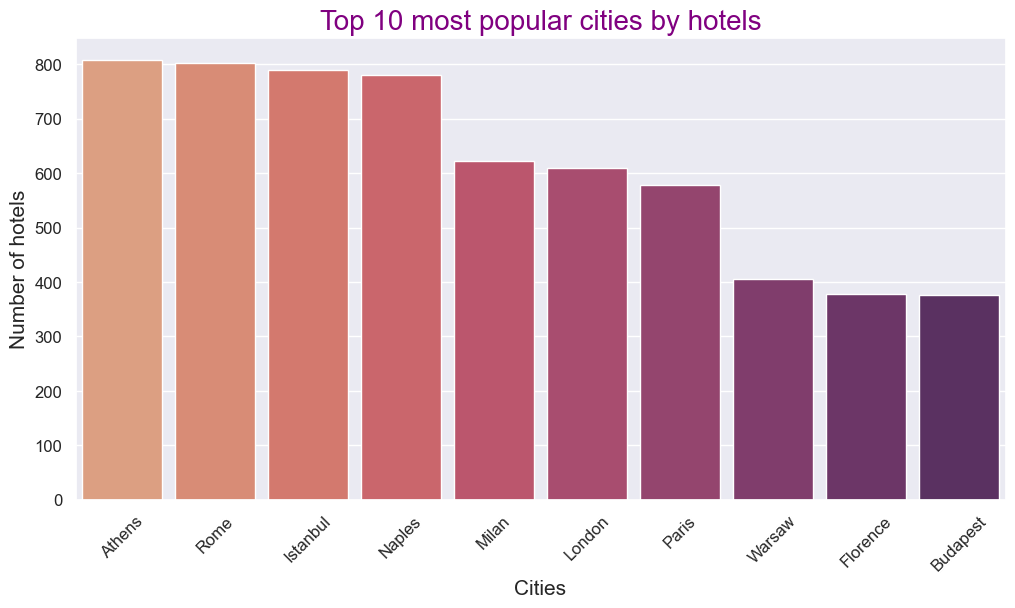

In [111]:
# 1.топ 5 городов с найбольшим количеством отелей
popular_cities = all_hotels\
        .groupby('city', as_index = False)\
        .aggregate({'hotel_name' : 'count'})\
        .sort_values(by='hotel_name', ascending=False)\
        .rename(columns={'hotel_name': 'number_of_hotels'})\
        .nlargest(columns='number_of_hotels', n = 10)

# popular_cities.reset_index(inplace=True) -> as_index = False
sns.barplot(data=popular_cities, x = 'city', y = 'number_of_hotels', palette='flare', width=0.85)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel('Cities', fontsize = 15)
plt.ylabel('Number of hotels', fontsize = 15) 
plt.tick_params(labelsize = 12)
_ = plt.title('Top 10 most popular cities by hotels', c = 'purple', fontsize = 20)

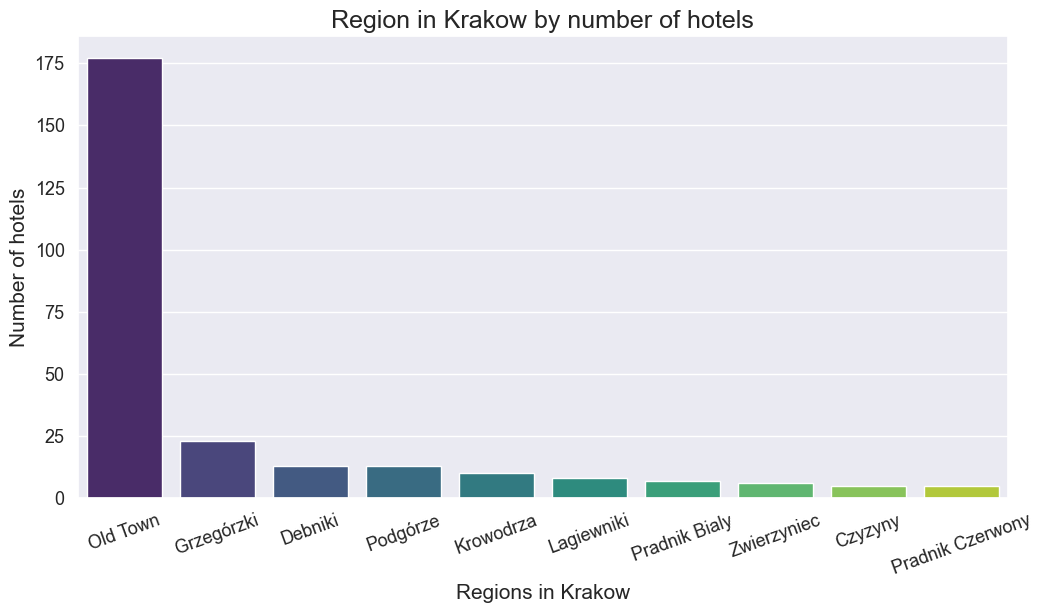

In [112]:
#найболее популярные районы
krakow_hotels = all_hotels[all_hotels['city'] == 'Krakow']
regions_in_krakow = krakow_hotels\
        .groupby('region')\
        .aggregate({'hotel_name' : 'count'})\
        .sort_values(by='hotel_name', ascending=False)\
        .rename(columns={'hotel_name': 'number_of_hotels'})\
        .nlargest(columns='number_of_hotels', n = 10)

regions_in_krakow.reset_index(inplace=True)
sns.barplot(data = regions_in_krakow, x='region', y = 'number_of_hotels', palette='viridis')
plt.xticks(rotation = 20)
sns.set(rc={'figure.figsize':(12,4)})
plt.xlabel('Regions in Krakow', fontsize = 15)
plt.ylabel('Number of hotels', fontsize = 15)
plt.tick_params(labelsize = 13)
_ = plt.title('Region in Krakow by number of hotels', fontsize = 18)

lower_fence: -1744.0
uppper_fence: 3512.0
The most popular marks - 8.5


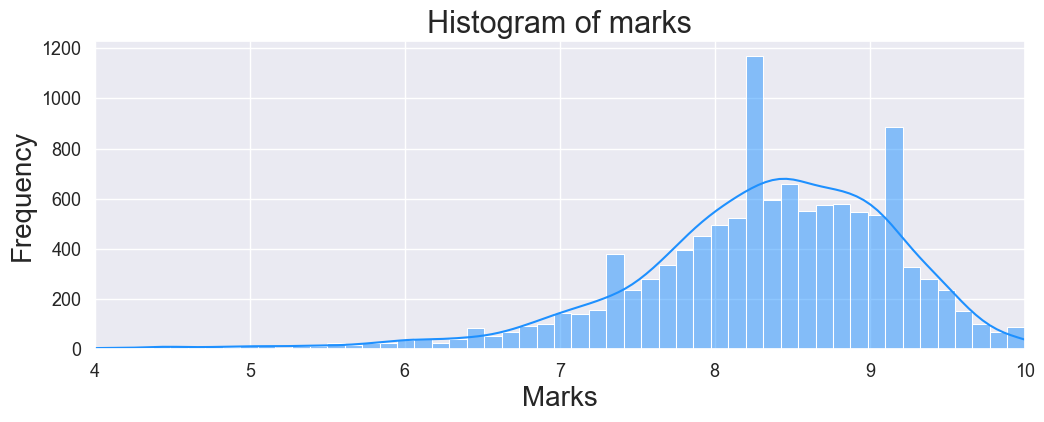

In [117]:
# histogram marks
q75, q25 = np.percentile(all_hotels['reviews'], [75 ,25])
iqr = q75 - q25

# Find the lower fence, being Q1 — (1.5*IQR).
lower_fence = q25 - (1.5*iqr)
print(f'lower_fence: {lower_fence}')
# Find the upper fence, being Q3 + (1.5*IQR).
uppper_fence = q75 + (1.5*iqr)
print(f'uppper_fence: {uppper_fence}')

hotels_by_marks = all_hotels[(all_hotels['reviews'] >= lower_fence) & (all_hotels['reviews'] <= uppper_fence)] #
sns.histplot(data=hotels_by_marks.marks, kde = True, bins = 80, color = 'dodgerblue')
plt.xlim(4,10)
plt.title('Histogram of marks', fontsize = 22)
plt.tick_params(labelsize = 13)
plt.xlabel(xlabel='Marks', fontsize = 20)
plt.ylabel(ylabel='Frequency', fontsize = 20)


print(f'The most popular marks - {all_hotels.marks.mode()[0]}')

In [122]:
# зробити 4 графика, на одному показує топ отелей з самой низкой оценкой, на другом з самой високой оценкой, 
# далі топ міста з середньою оцінкою і потім топ районів з середньою оцінкою

# вибрати 4 міста в польщі і по ним зробити топ районів по оцінкам


# 5.Посчитать города з самой большой средной всех отелей

#1
top_cities = all_hotels\
    .groupby(by=['city'])\
    .aggregate({'marks' : 'mean'})\
    .sort_values(by = 'marks', ascending=True)\
    .rename(columns={'marks' : 'mean_of_hotels'})\
    .nlargest(columns='mean_of_hotels', n = 5)

top_cities['mean_of_hotels'] = top_cities['mean_of_hotels'].map(lambda number: round(number, 2))
top_cities.reset_index(inplace=True)

#2
worst_marks = all_hotels\
    .groupby('city')\
    .aggregate({'marks' : 'mean'})\
    .rename(columns={'marks' : 'mean_of_hotels'})\
    .nsmallest(columns = 'mean_of_hotels', n = 5)

worst_marks['mean_of_hotels'] = worst_marks['mean_of_hotels'].map(lambda number: round(number, 2))
worst_marks.reset_index(inplace=True)
worst_marks.sort_values(by = 'mean_of_hotels', ascending=False, inplace=True)

#3
hotels_rating  = all_hotels\
    .groupby('stars')\
    .aggregate({'stars': 'count'})\
    .rename(columns={'stars' : 'number of hotels'})\


hotels_rating.reset_index(inplace=True)
hotels_rating['stars'] = hotels_rating['stars'].apply(lambda x: str(x))

#4 
hotels_performances = all_hotels\
    .groupby('performances')\
    .aggregate({'performances' : 'count'})\
    .rename(columns={'performances' : 'number of hotels'})\


hotels_performances.reset_index(inplace=True)

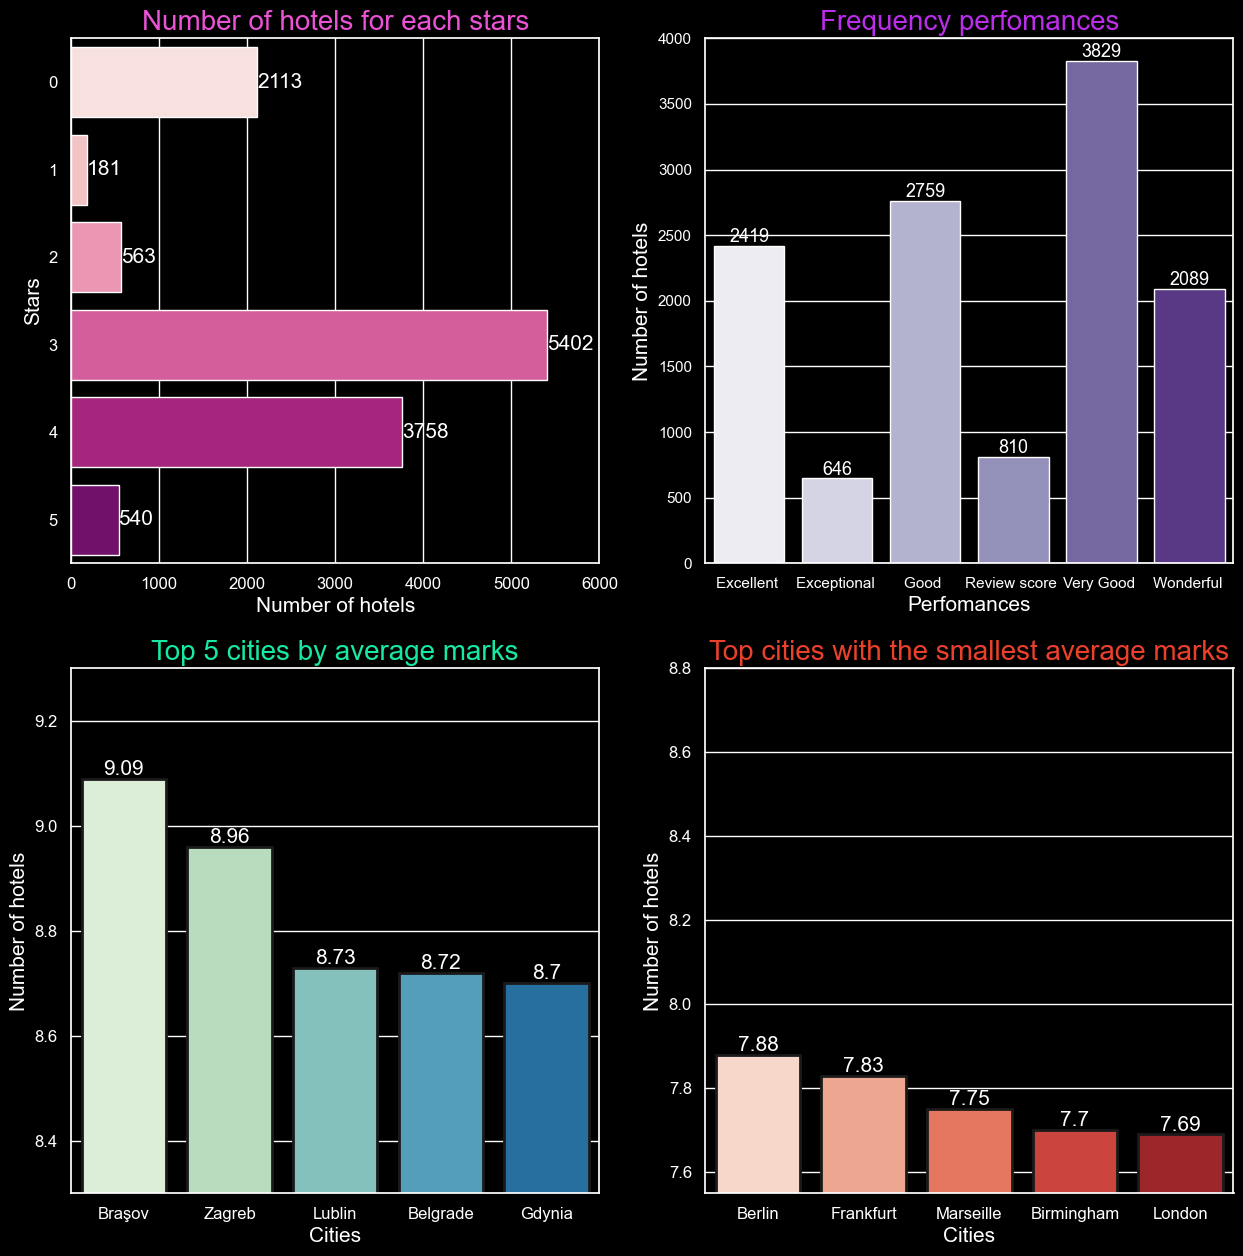

In [124]:
figure, axes = plt.subplots(2, 2, figsize=(15,15))
plt.style.use('dark_background')

# 1 
sns.barplot(ax = axes[0,0], data = hotels_rating, x = 'number of hotels', y = 'stars', palette='RdPu')
axes[0,0].bar_label(axes[0,0].containers[0],fontsize = 15) # label
axes[0,0].set_xlim(0, 6000) # change x axis range 

axes[0,0].set_title('Number of hotels for each stars',fontsize = 20, c = '#EB52D5')
axes[0,0].set_xlabel(xlabel = 'Number of hotels' , fontsize = 15)
axes[0,0].set_ylabel(ylabel = 'Stars' , fontsize = 15)
axes[0,0].tick_params(labelsize=12)




# 2
sns.barplot(ax = axes[0,1], data = hotels_performances, y = 'number of hotels', x = 'performances', palette='Purples')
axes[0,1].bar_label(axes[0,1].containers[0], fontsize = 13) # label
axes[0,1].set_ylim(0, 4000) # change x axis range 
axes[0,1].set_title('Number of hotels for each performances',fontsize = 20)

axes[0,1].set_title('Frequency perfomances', fontsize = 20, c = '#BC2DEB')
axes[0,1].set_xlabel(xlabel = 'Perfomances' , fontsize = 15)
axes[0,1].set_ylabel(ylabel = 'Number of hotels', fontsize = 15)
axes[0,1].tick_params(labelsize=11)


# 3 сколько отелей со сколькими звездами
sns.barplot(ax=axes[1, 0], data=top_cities, x='city', y='mean_of_hotels', palette='GnBu', linewidth=2, edgecolor="k")
axes[1,0].set_ylim(8.3,9.3) # change x axis range 
axes[1,0].bar_label(axes[1,0].containers[0],fontsize = 15) # label
axes[1,0].set_xticklabels(labels=top_cities.city)

axes[1,0].set_title('Top 5 cities by average marks', fontsize = 20, c = '#17E8A3')
axes[1,0].set_xlabel(xlabel = 'Cities' , fontsize = 15)
axes[1,0].set_ylabel(ylabel = 'Number of hotels' , fontsize = 15)
axes[1,0].tick_params(labelsize=12)

#4 
sns.barplot(ax=axes[1, 1], data=worst_marks, x='city', y='mean_of_hotels', palette='Reds', linewidth=2, edgecolor="k")
axes[1,1].set_title('Top 5 cities by average marks', fontsize = 13)
axes[1,1].set_ylim(7.55, 8.8) # change x axis range 
axes[1,1].bar_label(axes[1,1].containers[0],fontsize = 15) # label

axes[1,1].set_title('Top cities with the smallest average marks', fontsize = 20, c = '#EB402A')
axes[1,1].set_xlabel(xlabel = 'Cities' , fontsize = 15)
axes[1,1].set_ylabel(ylabel = 'Number of hotels' , fontsize = 15)
axes[1,1].tick_params(labelsize=12)


In [75]:
fig = px.scatter(data_frame=all_hotels, x = 'marks', y = 'reviews', color = 'performances')
fig

In [76]:
def classify_region_of_europe(city):

    regions_of_europe = {'Eastern Europe': [ 'Szczecin', 'Sofia', 'Toruń', 'Gdynia', 'Bratislava', 'Krakow', 'Poznań', 'Wrocław', 'Vilnius', 'Łódź','Budapest','Katowice','Belgrade','Braşov', 'Lublin','Warsaw'], 
                    'Southern Europe': ['Madrid', 'Seville', 'Venice', 'Bologna', 'Zagreb', 'Istanbul', 'Manchester', 'Florence','Ljubljana','Rome','Barcelona','Lisbon','Milan','Heraklio','Porto','Turin','Athens',], 
                    'Western Europe': ['Nice', 'Hamburg', 'Zurich', 'Bordeaux', 'Cologne','Marseille','Berlin','Leipzig','Munich','Birmingham','Paris','Naples'], 
                    'Northern Europe': ['Liverpool','Amsterdam', 'Reykjavík','Frankfurt','Dublin','Brussels','Stockholm', 'Tallinn','Copenhagen','Edinburgh','Helsinki','London', 'Riga']}

    for region, cities in regions_of_europe.items():
        if city in cities:
            return region        


all_hotels['region_of_europe'] = all_hotels['city'].map(lambda city: classify_region_of_europe(city))
df_frequency_regions = all_hotels['region_of_europe'].value_counts().reset_index().sort_values(by = 'region_of_europe', ascending=False)
df_frequency_regions.rename(columns={'index' : 'Region of Europe', 'region_of_europe' : 'frequency'}, inplace=True)


#Add cumulative percentage column
df_frequency_regions['cumulative percentage'] = round(df_frequency_regions['frequency'].cumsum()/df_frequency_regions['frequency'].sum(),2)
df_frequency_regions



fig = go.Figure([go.Bar(x=df_frequency_regions['Region of Europe'], y = df_frequency_regions['frequency'],yaxis='y1', name='count'),
                    go.Scatter(x=df_frequency_regions['Region of Europe'], y = df_frequency_regions['cumulative percentage'], yaxis='y2', name='cumulative ratio', marker_color = '#FF6600', marker_size = 10)])
                

fig.update_layout(template='plotly_white', showlegend=False, hovermode='x', bargap=.3,
                    title={'text': 'Pareto Chart', 'x': .5}, 
                    yaxis={'title': 'Frequency'},
                    yaxis_range=[0,7500],
                    yaxis2={'rangemode': "tozero", 'overlaying': 'y',
                            'position': 1, 'side': 'right',
                            'title': 'Ratio',
                            'tickvals': np.arange(0, 1.1, .2),
                            'tickmode': 'array',
                            'ticktext': [str(i) + '%' for i in range(0, 101, 20)]},
                    width= 850,
                    height = 600,
                    )

fig.show()

In [77]:
hotels_with_discount_price_summary=  hotels_with_discount_price['discount_price'].describe()

for i_item in hotels_with_discount_price_summary.keys():
    print('{} - {}'.format(i_item, round(hotels_with_discount_price_summary[i_item],2)))

count - 3277.0
mean - 468.45
std - 305.16
min - 27.0
25% - 281.0
50% - 398.0
75% - 567.0
max - 5784.0


In [139]:
# correlaction
def create_vline(x_coordinate, annotation_text, line_dash, line_color = 'orange'):

    v_line = fig.add_vline(x = x_coordinate, 
        line_width=3, 
        line_color=line_color,  
        line_dash = 'dash',
        annotation_text=annotation_text, 
        annotation_position  = 'top right'
    )

    return v_line

#create mediana
hotels_with_discount_price_median = round(hotels_with_discount_price['discount_price'].median(),3)
mediana_discount_price = create_vline(x_coordinate=hotels_with_discount_price_median, annotation_text = f'Median = {hotels_with_discount_price_median}', line_dash = 'dash')

#lower Control Limit
LCL = round(hotels_with_discount_price['discount_price'].median() - 3 * hotels_with_discount_price['discount_price'].std(),3)
if LCL < 0:
    LCL = hotels_with_discount_price['discount_price'].min()
lcl_discount_price = create_vline(x_coordinate=LCL, annotation_text =  f'LCL = {LCL}', line_dash = 'dash', line_color='green')

#Upper Control Limit
UCL = round(hotels_with_discount_price['discount_price'].median() + 3 * hotels_with_discount_price['discount_price'].std(),3)


df_outilers = hotels_with_discount_price[hotels_with_discount_price['discount_price'] > UCL]
hotel_prices_lcl_ucl = pd.concat([hotels_with_discount_price, df_outilers, df_outilers]).drop_duplicates(keep=False)

# again calculate upper control limit 
UCL = round(hotel_prices_lcl_ucl['discount_price'].median() + 3 * hotels_with_discount_price['discount_price'].std(),3)
print(UCL)

ucl_discount_price = create_vline(x_coordinate=UCL, annotation_text = f'UCL = {UCL}', line_dash = 'dash', line_color='blue')

fig.layout.update(
    annotations=[dict(
          align = "left",
          textangle=90,
          font=dict(
            size=14,
            color="black"
            )
        )
    ]

)
fig.show()


fig = px.scatter(hotel_prices_lcl_ucl, 
        x="discount_price", 
        y = 'original_price', 
        color= 'stars',
        size = 'percentage_discount',
        size_max=25,
        opacity=0.4,
        trendline='ols',
        trendline_color_override="red",
        title="Scatter plot between orignal prices and discount prices",
        width=1100,
        height=600,
        
        color_continuous_scale='Bluered'
) 

1308.493


In [141]:
# box - plot ?
px.box(data_frame=all_hotels)

ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [81]:
hotels_categories = all_hotels.copy()

def classify_discriptions(discription):
        premium_category = ['premium', 'superior', 'king', 'queen',  'luxury', 'suite', 'executive', 'deluxe']
        motel_category = ['bed in', 'dormitory']
        category = ['room', 'apartment', 'bed in', 'studio', 'house']
        double_rooms = ['double room', 'twin']
        single_rooms = ['single', 'single room', 'solo']
        budgets = ['budget', 'economy'] 


        if category[4] in discription.lower():
            return 'House'

        if category[3] in discription.lower():
            return 'Studio'

        if 'standard' in discription.lower():
            return 'Standard'

        if category[1] in discription.lower():
            return 'Apartment'

        for elem in range(len(budgets)):
            if budgets[elem] in discription.lower():
                return 'Budget'

        for elem in range(len(single_rooms)):
            if single_rooms[elem] in discription.lower():
                return 'Single room'

        for elem in range(len(motel_category)):
                    if motel_category[elem] in discription.lower():
                        return 'Motel'    

        for elem in range(len(premium_category)):
            if premium_category[elem] in discription.lower():
                return 'High standard'
        
        
        for elem in range(len(double_rooms)):
            if double_rooms[elem] in discription.lower():
                return 'Double room'


        if 'room' in discription.lower():
            return 'Room'
        

hotels_categories['category'] = hotels_categories['discriptions'].apply(lambda discription: classify_discriptions(discription))
hotels_categories['category'].value_counts()

hotels_categories.category.isnull().sum() # 408
hotels_categories.category.fillna('Other', inplace=True)
hotels_categories.category.isnull().sum() # 0 

series = hotels_categories.category.value_counts()
df = series.reset_index()
df_categories = df.rename(columns={'category' : 'frequency', 'index' : 'categories'})


pie_plot = px.pie(data_frame=df_categories, 
        names = df_categories.categories,
        values= df_categories.frequency,
        title='Сategories of hotels',
        width=650,
        height=450,
        color_discrete_sequence=px.colors.sequential.RdBu
    )
pie_plot.update_layout(uniformtext_minsize=13, uniformtext_mode='hide')

pie_plot.show()

df_categories

,categories,frequency
0,Double room,2806
1,Single room,2365
2,Standard,1798
3,High standard,1761
4,Apartment,1542
5,Studio,704
6,Budget,580
7,Motel,459
8,Room,392
9,Other,110


In [91]:

scatter_plt = px.scatter(data_frame=hotels_categories, 
    y = 'distances', 
    x = 'original_price', 
    facet_col='category', 
    facet_col_wrap=4, 
    color = 'stars',
    width=1300,
    height=1000,
    #color_continuous_scale='Plotly3'
)
d
scatter_plt.show()

In [102]:
# Какие категории отелей мают скидки:
hotels_with_discount_price['category'] = hotels_with_discount_price['discriptions'].map(lambda description: classify_discriptions(description))


def modify_df(df):

    df = df['category'].value_counts().reset_index()
    df.rename(columns={'category': 'frequency', 'index' : 'category'}, inplace=True)
    
    return df

df1 = modify_df(hotels_with_discount_price)
df1.sort_values(by = 'category', inplace=True, ignore_index=True)

df2 = modify_df(hotels_categories)
df2 = df2[df2.index != 9]
df2.sort_values(by = 'category', inplace=True, ignore_index=True)

df3 = pd.concat([df1, df2], join = 'inner', ignore_index=False, axis = 1)
df3.columns = [f'column {i}' for i,_ in enumerate(df3.columns)]
df3['percantage'] = round((df3['column 1'] / df3['column 3'])*100,2)

px.bar(data_frame=df3, 
    y = 'percantage', 
    x = 'column 0', 
    color = 'column 0', 
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="which category of hotels has the most discounts"
)